In [5]:
import numpy as np
import matplotlib.pyplot as plt

B_Earth = 25e-6 # T
m_muon = 0.1056 # GeV
e = 1.602e-19 # Coulombs per mu
c = 3e8 # m/s
kg_to_GeV = 5.61e26


## Lorentz force

$F = q \vec{v} \times \vec{B}$

assume $\vec{v} \equiv v \hat{z}$ and $\vec{B} \equiv B \hat{x}$

Note $v = \beta c = (pc/E) c = (\sqrt{E^2 - (mc^2)^2}/E)c= \sqrt{1 - (mc^2/E)^2} c$

Acceleration: $a = F/m = qvB/m = q B c^3 \sqrt{(mc^2)^{-2} - (E)^{-2}}$

In [28]:
def LorentzAcceleration(E_muon):
    v = np.sqrt(1-(m_muon/E_muon)**2)*c # m/s
    a = e*v*B_Earth/(m_muon/kg_to_GeV) # Coulombs m/s A / kg = m/s^2
    return a

def BendingRadius(E_muon):
    p_muon = np.sqrt(E_muon**2 - m_muon**2)
    return p_muon / (0.3 * B_Earth) # eq 11.5 grupen
    
def LorentzDeflection(E_muon,dz):
    vz = np.sqrt(1-(m_muon/E_muon)**2)*c # m/s
    dt = dz/vz
    a = LorentzAcceleration(E_muon)
    print(a/1e12)
    dx = 1./2. * a * dt**2
    return dx

def DeflectionAngle(E_muon,dz):
    return dz/BendingRadius(E_muon)
    

[]

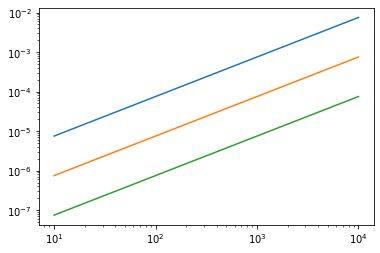

In [30]:
dzrange = np.logspace(1,4,100)
Energies = [1e1,1e2,1e3]
for E_muon in Energies:
    plt.plot(dzrange,DeflectionAngle(E_muon,dzrange),label=r"$E_\mu=%2.2e$"%E_muon)
plt.loglog()